In [80]:
from math import modf
from numpy import std, mean
from time import time
import matplotlib.pyplot as plt

def cont_fraction(n):
    counter = 1
    p = numerator(n)
    q = denominator(n)
    output = []
    while counter != 0:
        r = math.floor(p / q)
        output.append(int(r))
        counter = p
        counter -= (q * r)
        p = q
        q = counter
    return output

def reducts(fraction):
    P = [1, fraction[0]]
    Q = [0, 1]
    for i in range(1, len(fraction)):
        P.append((fraction[i]*P[-1]) + P[-2])
        Q.append((fraction[i]*Q[-1]) + Q[-2])
    P.pop(0)
    Q.pop(0)
    output = [i/j for i, j in zip(P,Q)]
    return output

def broken_gen(m):
    m1 = m // 2
    p = 1
    q = 1
    while True:
        q = random_prime(2^(m1+1), 2^(m1+2))
        p = random_prime(2^(m1+1), 2^(m1+2))
        N = p * q
        if len(bin(N)) - 2 == m:
            break
    phiN = (p - 1) * (q - 1)
    d = 2
    while True:
        while gcd(d, phiN) != 1:
            d = d + 1
        e = inverse_mod(d, phiN)
        if gcd(e, phiN) == 1:
            break
    return p, q, N, d%phiN, e%phiN #dlugosc modulu (n) jest rowna m 

def wiener(N, e):
    F = cont_fraction(e/N)
    R = reducts(F)
    p = 1
    q = 1
    phi = 0
    print(R)
    for i in R:
        k = numerator(i)
        d = denominator(i)
        if k == 0:
            continue
        phi = ((e*d) - 1) / k
        b = N - phi + 1
        delta = (b)**2 - (4 * N)
        if delta > 0:
            p = (-b + math.sqrt(delta)) / 2
            q = (-b - math.sqrt(delta)) / 2
            print(p)
            print(q)
        else:
            continue
        if p.is_integer() and q.is_integer() and p != 0 and q != 0 and (N/p).is_integer() and (N/q).is_integer() :
            return d

def dioph(nbits):
    p, q, N, d, e = broken_gen(nbits)
    it_may_be_d = wiener(N, e)
    if it_may_be_d == d:
        return 1
    else:
        return 0

def test(n):
    counter = 0
    times = []
    print("Test dla parametru bezpieczenstwa = "+str(n))
    for i in range(0,1000):
        start = time()
        result = dioph(n)
        end = time()
        times.append(end-start)
        if result == 1:
            counter +=1
    print("Liczba testow, ktore sie powiodly dla parametru bezpieczenstwa "+str(n)+" wynosi "+str(counter))
    suma = sum(times)
    print("Calkowity czas 1000 testow zajal "+str(suma))
    srednia = mean(times)
    print("Sredni czas wykonania jednego testu "+str(srednia))
    odchylenie = std(times)
    print("Odchylenie standardowe czasow wykonania jednego testu "+ str(odchylenie))
    return suma, srednia, odchylenie



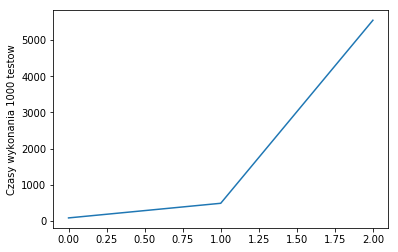

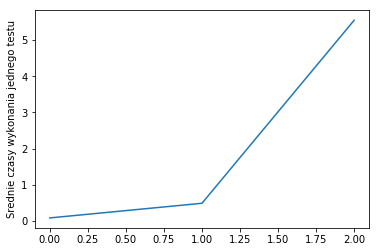

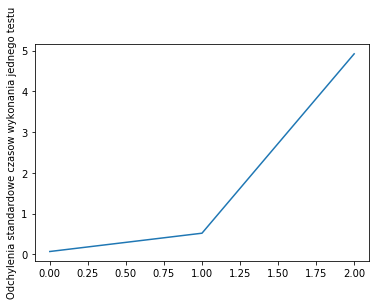

In [233]:
n = [2^i for i in range(8,12)]
print(n)
times = []
suma = 0
srednia = 0
odchylenie = 0

times = []
avgs = []
stds = []
for i in n:
    suma, srednia, odchylenie = test(i)
    times.append(suma)
    avgs.append(srednia)
    stds.append(odchylenie)

    
plt.plot(times)
plt.ylabel("Czasy wykonania 1000 testow")
plt.show()

plt.plot(avgs)
plt.ylabel("Srednie czasy wykonania jednego testu")
plt.show()

plt.plot(stds)
plt.ylabel("Odchylenia standardowe czasow wykonania jednego testu")
plt.show()

In [231]:
x = cont_fraction(925/101)
reducts(x)

[9, 55/6, 174/19, 925/101]

In [232]:
broken_gen(17)

(257, 491, 126187, 3, 83627)